In [1]:
from __future__ import print_function
import time
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, merge, BatchNormalization,GRU
from keras.datasets import imdb

import os
from keras.preprocessing.text import Tokenizer

Using Theano backend.


In [2]:

max_features =899
max_len = 500  # cut texts after this number of words (among top max_features most common words)

In [3]:
X_train = []
y_train = []

path = 'C:/VS_4D/out/train/pos/'
X_train.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
y_train.extend([1 for _ in range(663)])

path = 'C:/VS_4D/out/train/neg/'
X_train.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
y_train.extend([0 for _ in range(238)])

In [4]:
X_test = []
y_test = []

path = 'C:/VS_4D/out/test/pos/'
X_test.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
y_test.extend([1 for _ in range(298)])

path = 'C:/VS_4D/out/test/neg/'
X_test.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
y_test.extend([0 for _ in range(88)])

In [5]:
print("Number of words: ")
print(len(np.unique(np.hstack(X_train ))))

Number of words: 
899


Review length: 
Mean 6096.90 words (4040.412157)


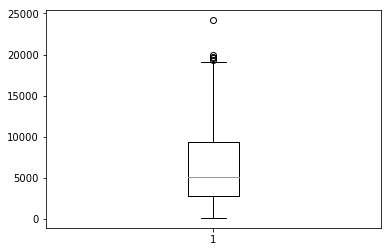

In [6]:
from matplotlib import pyplot
# Summarize review length
print("Review length: ")
result = map(len, X_train)
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [7]:

#tokenize works to list of integers where each integer is a key to a word
imdbTokenizer = Tokenizer(nb_words=max_features)

imdbTokenizer.fit_on_texts(X_train)

In [21]:
#create int to word dictionary
intToWord = {}
for word, value in imdbTokenizer.word_index.items():
    intToWord[value] = word

#add a symbol for null placeholder
intToWord[0] = "!!!NA!!!"
    
print(intToWord[1])
print(intToWord[2])
print(intToWord[32])

và
trong
đó


In [23]:
#convert word strings to integer sequence lists
#print(X_train[0])
#print(imdbTokenizer.texts_to_sequences(X_train[:1]))
#for value in imdbTokenizer.texts_to_sequences(X_train[:1])[0]:
    #print(intToWord[value])
    
X_train = imdbTokenizer.texts_to_sequences(X_train)
X_test = imdbTokenizer.texts_to_sequences(X_test)


[344 353  54  67 161  17  67 308  15   5   3  30  78 124 207   5   3 245
   8 161  22 271 101  62  97 219 491 234 156  37  75 156 231 447 794 242
  78 344 353  54  67 161   3  14  17  67 308  15   5   3  30  78 124 207
   5   3 245   8 161  22 271 101  62  97 219 491 234 156 206 354 156  96
  78 344 353  54  67 161  17  67 308  15   5  76   3  30  78 124 207   5
   3 245   8 161  22 271 101  62  97 219 491 234 245  76 218 156 195 228
   1 209  26  37 156 195 228  78 344 353  54  67 161   3  14  17  67 308
  15   5  76   3  30  78 124 207   5   3 245   8 161  22 271 101  62  97
 219 491 234 156 424 517   1 538 156 424 203 285 202 123 363 247  78 344
 353  54  67 161  17  67 308  15   5   3  30  78 124 207   5   3 161  22
 271 101  62  97 219 491 234 156  37  75 156 583 472   1   7  37 242  24
 788 583 472  78 344 353  54  67 161   3  14  17  67 308  15   5   3  30
  78 124 207   5   3 245   8 161  22 271 101  62  97 219 491 234 156 220
 788 156 220 788 194  78 344 353  54  67 161  17  6

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [10]:

# Censor the data by having a max review length (in number of words)

#use this function to load data from keras pickle instead of munging as shown above
#(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features,
#                                                      test_split=0.2)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

901 train sequences
386 test sequences
Pad sequences (samples x time)
X_train shape: (901L, 500L)
X_test shape: (386L, 500L)


In [11]:
print(np.unique(y_train))

[0 1]


In [12]:
epochs = 3
embedding_neurons = 32
lstm_neurons = 128
batch_size =32

In [13]:

# Forward Pass LSTM Network

# this is the placeholder tensor for the input sequences
sequence = Input(shape=(max_len,), dtype='int32')
# this embedding layer will transform the sequences of integers
# into vectors of size embedding
# embedding layer converts dense int input to one-hot in real time to save memory
embedded = Embedding(max_features, embedding_neurons, input_length=max_len)(sequence)
# normalize embeddings by input/word in sentence
bnorm = BatchNormalization()(embedded)

# apply forwards LSTM layer size lstm_neurons
forwards = GRU(lstm_neurons, dropout_W=0.3, dropout_U=0.3)(bnorm)

# dropout 
after_dp = Dropout(0.4)(forwards)
output = Dense(1, activation='sigmoid')(after_dp)

model_fdir_atom = Model(input=sequence, output=output)
# review model structure
print(model_fdir_atom.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 500, 32)       28768       input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 500, 32)       128         embedding_1[0][0]                
____________________________________________________________________________________________________
gru_1 (GRU)                      (None, 128)           61824       batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [14]:
# Forward pass LSTM network

# try using different optimizers and different optimizer configs
model_fdir_atom.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
start_time = time.time()

history_fdir_atom = model_fdir_atom.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=[X_test, y_test], 
                    verbose=2)

end_time = time.time()
average_time_per_epoch = (end_time - start_time) / epochs
print("avg sec per epoch:", average_time_per_epoch)

scores = model_fdir_atom.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train...
Train on 901 samples, validate on 386 samples
Epoch 1/3
87s - loss: 0.6540 - acc: 0.6648 - val_loss: 0.6038 - val_acc: 0.7720
Epoch 2/3
91s - loss: 0.5759 - acc: 0.7347 - val_loss: 0.5986 - val_acc: 0.7720
Epoch 3/3
86s - loss: 0.5289 - acc: 0.7558 - val_loss: 0.5796 - val_acc: 0.7720
avg sec per epoch: 96.9490000407
Accuracy: 77.20%


In [15]:

# Bi-directional Atom

# based on keras tutorial: https://github.com/fchollet/keras/blob/master/examples/imdb_bidirectional_lstm.py

# this is the placeholder tensor for the input sequences
sequence = Input(shape=(max_len,), dtype='int32')
# this embedding layer will transform the sequences of integers
# into vectors of size embedding
# embedding layer converts dense int input to one-hot in real time to save memory
embedded = Embedding(max_features, embedding_neurons, input_length=max_len)(sequence)
# normalize embeddings by input/word in sentence
bnorm = BatchNormalization()(embedded)

# apply forwards LSTM layer size lstm_neurons
forwards = GRU(lstm_neurons, dropout_W=0.3, dropout_U=0.3)(bnorm)
# apply backwards LSTM
backwards = GRU(lstm_neurons, dropout_W=0.3, dropout_U=0.3, go_backwards=True)(bnorm)

# concatenate the outputs of the 2 LSTMs
merged = merge([forwards, backwards], mode='concat', concat_axis=-1)
after_dp = Dropout(0.4)(merged)
output = Dense(1, activation='sigmoid')(after_dp)

model_bidir_atom = Model(input=sequence, output=output)
# review model structure
print(model_bidir_atom.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 500, 32)       28768       input_2[0][0]                    
____________________________________________________________________________________________________
batchnormalization_2 (BatchNorma (None, 500, 32)       128         embedding_2[0][0]                
____________________________________________________________________________________________________
gru_2 (GRU)                      (None, 128)           61824       batchnormalization_2[0][0]       
___________________________________________________________________________________________

In [16]:

# Bi-directional Atom

# try using different optimizers and different optimizer configs
model_bidir_atom.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
start_time = time.time()

history_bidir_atom = model_bidir_atom.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=[X_test, y_test], 
                    verbose=2)

end_time = time.time()
average_time_per_epoch = (end_time - start_time) / epochs
print("avg sec per epoch:", average_time_per_epoch)

Train...
Train on 901 samples, validate on 386 samples
Epoch 1/3
166s - loss: 0.6435 - acc: 0.6648 - val_loss: 0.6031 - val_acc: 0.7720
Epoch 2/3
175s - loss: 0.5528 - acc: 0.7381 - val_loss: 0.5842 - val_acc: 0.7720
Epoch 3/3
185s - loss: 0.5247 - acc: 0.7658 - val_loss: 0.5651 - val_acc: 0.7720
avg sec per epoch: 192.251333396


In [17]:
test = "hhbi"

test = imdbTokenizer.texts_to_sequences([test])

In [18]:
from keras.preprocessing import sequence
test = sequence.pad_sequences(test, maxlen=max_len)
print(test.shape)

(1L, 500L)


In [19]:
predict=model_bidir_atom.predict(test)
print(predict)

[[ 0.6093834]]


In [20]:
rounded = [round(x) for x in predict]
print(rounded)

[1.0]
